In [2]:
%cd ..

/Users/juansegundohevia/Documents/repos/ConceptGuidedColorization


In [12]:
from skimage import color
from PIL import Image
import json 
import os 
import torch 
import numpy as np 
from data_loader import ColorizationDataset
import util
import matplotlib.pyplot as plt

In [14]:
IMSIZE = 256

def apply_paper_transform(image):
    _input = torch.from_numpy(1, 1, IMSIZE, IMSIZE)
    img_lab = color.rgb2lab(image, illuminant='D50')
    img_l = img_lab[:, :, 0] / 100
    _input = torch.from_numpy(np.expand_dims(img_l, 0))

    img_a_scale = (img_lab[:, :, 1:2] + 88) / 185
    img_b_scale = (img_lab[:, :, 2:3] + 127) / 212

    img_ab_scale = np.concatenate((img_a_scale, img_b_scale), axis=2)
    _label = torch.from_numpy(img_ab_scale.transpose((2, 0, 1)))

    return _input, _label

def visualize_palette(sample_palette):

    fig, ax = plt.subplots(1, 5, figsize=(15, 3))

    for idx, col in enumerate(color.lab2rgb(sample_palette.reshape(5, 3))):
        ax[idx].imshow(np.ones((10, 10, 3)) * col)
        ax[idx].axis('off')

In [5]:
img_path = os.path.join('data', "bird256/train_palette", "images")
pal_path = os.path.join('data', "bird256/train_palette", "palettes")


data = ColorizationDataset(image_path=img_path, palette_path=pal_path, num_workers=4, batch_size=1)

In [8]:
img, pal = data[0]

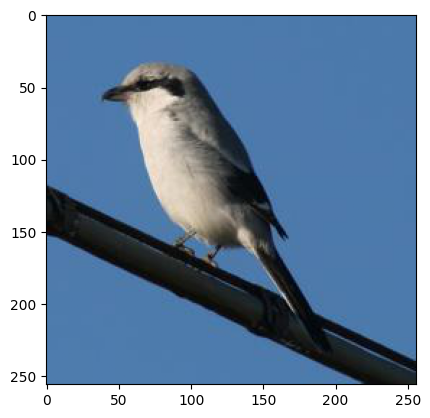

In [13]:
plt.imshow(img.permute(1, 2, 0))

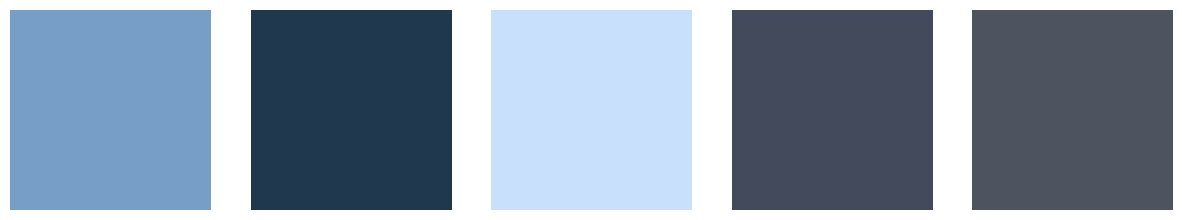

In [15]:
visualize_palette(pal)

# Compute A and B scales

In [28]:
img.size()

torch.Size([3, 256, 256])

In [35]:
# compute A range in Lab space

def compute_ranges(image):
    _permuted = image.permute(1, 2, 0)
    max_range = color.rgb2lab(_permuted, illuminant='D50').max(axis=(0, 1))
    min_range = color.rgb2lab(_permuted, illuminant='D50').min(axis=(0, 1))

    return max_range, min_range

In [36]:
from tqdm import tqdm

ranges_max = []
ranges_min = []

for i in tqdm(range(1000)):
    img, _ = data[i]
    max_range, min_range = compute_ranges(img)
    ranges_max.append(max_range)
    ranges_min.append(min_range)

100%|██████████| 1000/1000 [08:46<00:00,  1.90it/s]


In [ ]:
np.array(ranges_max).mean(axis=0), np.array(ranges_min).mean(axis=0)

(array([98.67296 , 32.142532, 48.51917 ], dtype=float32),
 array([  0.7733834, -25.889784 , -40.094276 ], dtype=float32))